In [ ]:
# !pip install qrcode

In [ ]:
# !pip install diffusers

In [1]:
import torch
import qrcode
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from PIL import Image
from dotenv import load_dotenv
load_dotenv()

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


True

In [2]:
controlnet = ControlNetModel.from_pretrained(
    "DionTimmer/controlnet_qrcode-control_v1p_sd15",
    torch_dtype = torch.float16
)

In [3]:
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    # "runwayml/stable-diffusion-v1-5",
    "digiplay/GhostMixV1.2VAE",
    controlnet = controlnet,
    torch_dtype = torch.float16,
    safety_checker =None,
).to("cuda")
pipe.enable_xformers_memory_efficient_attention()

text_encoder\model.safetensors not found
d:\Anaconda\envs\stablediffusion\Lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [4]:
def generate_qr_code(content:str):
    qr = qrcode.QRCode(
        version=1, 
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size = 16,
        border = 0,
    )
    
    qr.add_data(content)
    qr.make(fit=True)
    img = qr.make_image(fill_color = "black",back_color = "white")
    
    offset_min = 8*16
    w,h = img.size
    w = (w+255+offset_min)//256*256
    h = (h+255+offset_min)//256*256
    
    if w>1024:
        raise ValueError("QR Code is to big")
    
    bg = Image.new("L",(w,h),255)
    
    coords = ((w-img.size[0])//2//16*16,
              (h-img.size[1])//2//16*16
              )
    bg.paste(img, coords)
    return bg
    

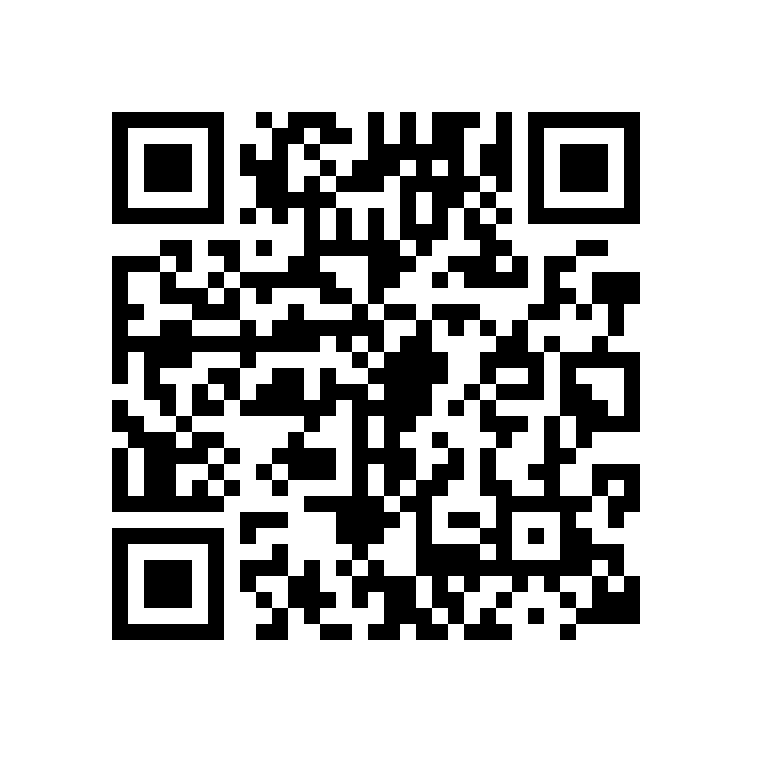

In [5]:
generate_qr_code("https://killerstrike17.github.io/")

  0%|          | 0/32 [00:00<?, ?it/s]

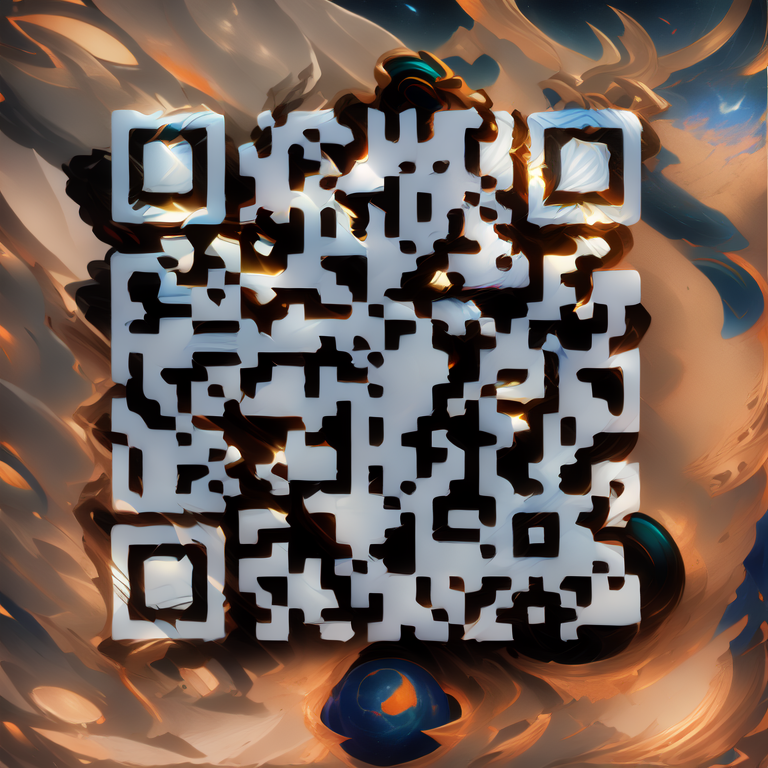

In [19]:
# prompt = "<lora:add_detail:1.5> , (Macro photo), miniature, (diorama), red panda (plushie), chibi, toy, (bokeh), close-up photo, 35mm, bokeh, 9:16, (intricate details:1.12), hdr, (intricate details, hyperdetailed:1.15), (soft light, sharp:1.5) <lyco:GoodHands-beta2:1> <lora:COOLKIDS:0.5>"
# prompt =" saigyou_ayakashi,  <lora:SaigyouAyakashiV1-000008:1>,bare tree,"
prompt = "concept art, Complementary 'The Universe of Memory', award winning, at Dawn, Cel shading, Animecore, Direct light, geometric patterns, high quality, absurdres, masterpiece  <lora:add_detail:1>"
# negative_prompt = "EasyNegativeV2, (bad-hands-5:1.2) Steps: 22, Sampler: Euler a, CFG scale: 8, Seed: 3478501788, Size: 768x768, Model hash: ec6f68ea63, ControlNet 0: preprocessor: inpaint_global_harmonious, model: controlnetQRCode_sd15V1 [9c780d03], weight: 1.2, starting/ending: (0, 1), resize mode: Crop and Resize, pixel perfect: True, control mode: Balanced, preprocessor params: (-1, -1, -1), Lora hashes: add_detail: 7c6bad76eb54"
negative_prompt = "(worst quality, low quality:1.4), child, loli, BadDream, aid291, an5, bad-artist, bad-artist-anime, bad-image-v2-39000, BadDream, badv4, EasyNegativeV2 FastNegativeEmbedding lr NegfeetV2 nobg notxt Unspeakable-Horrors-Composition-4v  verybadimagenegative_v1.3"
qrcode_content = "https://killerstrike17.github.io/"
qr_code_image = generate_qr_code(qrcode_content)
# generator = torch.Generator().manual_seed(2174793473)
generator = torch.Generator().manual_seed(2324230317)
# .initial_seed(2174793473)

output = pipe(
    prompt=prompt, 
    negative_prompt=negative_prompt,
    image = qr_code_image,
    width = qr_code_image.width,
    height=qr_code_image.height,
    guidance_scale=7,
    controlnet_conditioning_scale=3.2,
    generator=generator,
    num_inference_steps=32,
    # seed = 2174793473
)
output[0][0]

In [101]:
# output[0][0].save("monster.png")

In [15]:
import random
random.random()

0.23537494868674336

Seed: 396250463083


  0%|          | 0/50 [00:00<?, ?it/s]

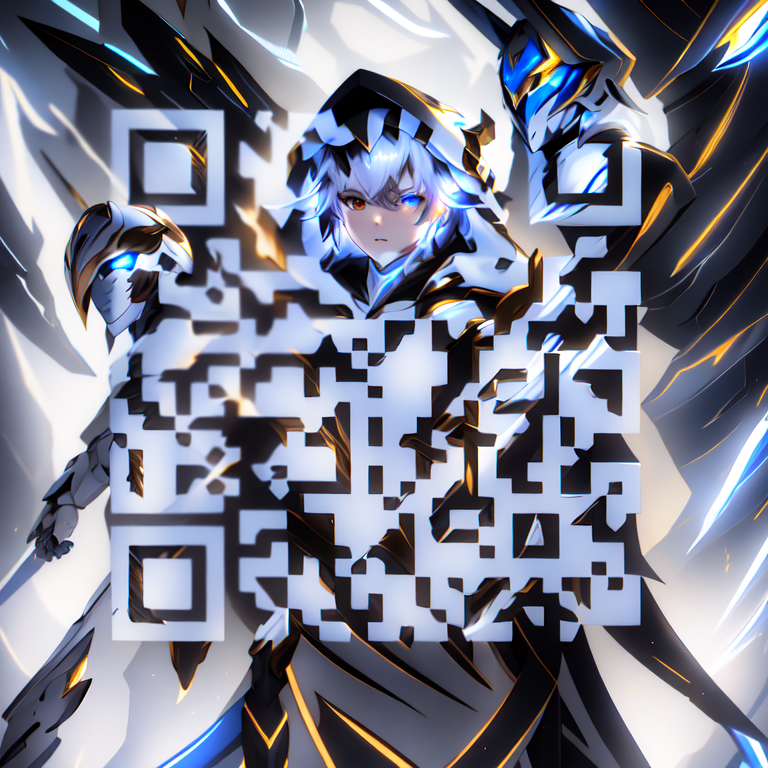

In [32]:
# prompt = "<lora:add_detail:1.5> , (Macro photo), miniature, (diorama), red panda (plushie), chibi, toy, (bokeh), close-up photo, 35mm, bokeh, 9:16, (intricate details:1.12), hdr, (intricate details, hyperdetailed:1.15), (soft light, sharp:1.5) <lyco:GoodHands-beta2:1> <lora:COOLKIDS:0.5>"
# prompt =" saigyou_ayakashi,  <lora:SaigyouAyakashiV1-000008:1>,bare tree,"
prompt = "light, futobot, cyborg, ((masterpiece),(best quality),(ultra-detailed), (full body:1.2), 1male, solo, hood up, upper body, mask, 1boy, male focus,white gloves, cloak, long sleeves, spaceship, lightning, hires"
# negative_prompt = "EasyNegativeV2, (bad-hands-5:1.2) Steps: 22, Sampler: Euler a, CFG scale: 8, Seed: 3478501788, Size: 768x768, Model hash: ec6f68ea63, ControlNet 0: preprocessor: inpaint_global_harmonious, model: controlnetQRCode_sd15V1 [9c780d03], weight: 1.2, starting/ending: (0, 1), resize mode: Crop and Resize, pixel perfect: True, control mode: Balanced, preprocessor params: (-1, -1, -1), Lora hashes: add_detail: 7c6bad76eb54"
negative_prompt = "ugly, disfigured, low quality, blurry"
qrcode_content = "https://killerstrike17.github.io/"
qr_code_image = generate_qr_code(qrcode_content)
# generator = torch.Generator().manual_seed(2174793473)
# seed = random.randint(1, 1000000000000)
seed = 396250463083
print("Seed:",seed)

generator = torch.Generator().manual_seed(seed)
# .manual_seed(2324230317)
# .initial_seed(2174793473)


output = pipe(
    prompt=prompt, 
    negative_prompt=negative_prompt,
    image = qr_code_image,
    width = qr_code_image.width,
    height=qr_code_image.height,
    guidance_scale=10,
    controlnet_conditioning_scale=2.75,
    control_guidance_start= 0.23,
    control_guidance_end= 0.9,
    generator=generator,
    num_inference_steps=50,
    # seed = 2174793473
)
output[0][0]

In [33]:
output[0][0].save("cyborg.png")

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ching to back, mechanical cervial attaching to neck, sitting, wires and cables connecting to head']


Seed: 698853158198


  0%|          | 0/50 [00:00<?, ?it/s]

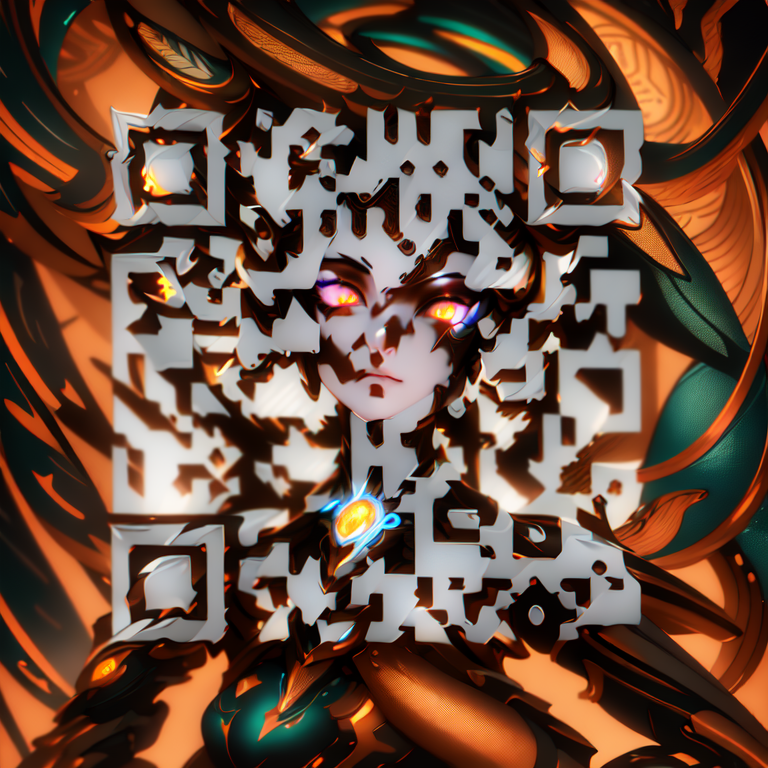

In [36]:
# prompt = "<lora:add_detail:1.5> , (Macro photo), miniature, (diorama), red panda (plushie), chibi, toy, (bokeh), close-up photo, 35mm, bokeh, 9:16, (intricate details:1.12), hdr, (intricate details, hyperdetailed:1.15), (soft light, sharp:1.5) <lyco:GoodHands-beta2:1> <lora:COOLKIDS:0.5>"
# prompt =" saigyou_ayakashi,  <lora:SaigyouAyakashiV1-000008:1>,bare tree,"
prompt = "1mechanical girl,ultra realistic details, portrait, global illumination, shadows, octane render, 8k, ultra sharp,intricate, ornaments detailed, cold colors, metal, egypician detail, highly intricate details, realistic light, trending on cgsociety, glowing eyes, facing camera, neon details, machanical limbs,blood vessels connected to tubes,mechanical vertebra attaching to back,mechanical cervial attaching to neck,sitting,wires and cables connecting to head"
# negative_prompt = "EasyNegativeV2, (bad-hands-5:1.2) Steps: 22, Sampler: Euler a, CFG scale: 8, Seed: 3478501788, Size: 768x768, Model hash: ec6f68ea63, ControlNet 0: preprocessor: inpaint_global_harmonious, model: controlnetQRCode_sd15V1 [9c780d03], weight: 1.2, starting/ending: (0, 1), resize mode: Crop and Resize, pixel perfect: True, control mode: Balanced, preprocessor params: (-1, -1, -1), Lora hashes: add_detail: 7c6bad76eb54"
negative_prompt = "ugly, disfigured, low quality, blurry"
qrcode_content = "https://killerstrike17.github.io/"
qr_code_image = generate_qr_code(qrcode_content)
# generator = torch.Generator().manual_seed(2174793473)
seed = random.randint(1, 1000000000000)
# seed = 396250463083
print("Seed:",seed)

generator = torch.Generator().manual_seed(seed)
# .manual_seed(2324230317)
# .initial_seed(2174793473)


output = pipe(
    prompt=prompt, 
    negative_prompt=negative_prompt,
    image = qr_code_image,
    width = qr_code_image.width,
    height=qr_code_image.height,
    guidance_scale=10,
    controlnet_conditioning_scale=2.75,
    control_guidance_start= 0.23,
    control_guidance_end= 0.9,
    generator=generator,
    num_inference_steps=50,
    # seed = 2174793473
)
output[0][0].save("Mechanical girl_2.png")
output[0][0]

Seed: 885162813


  0%|          | 0/50 [00:00<?, ?it/s]

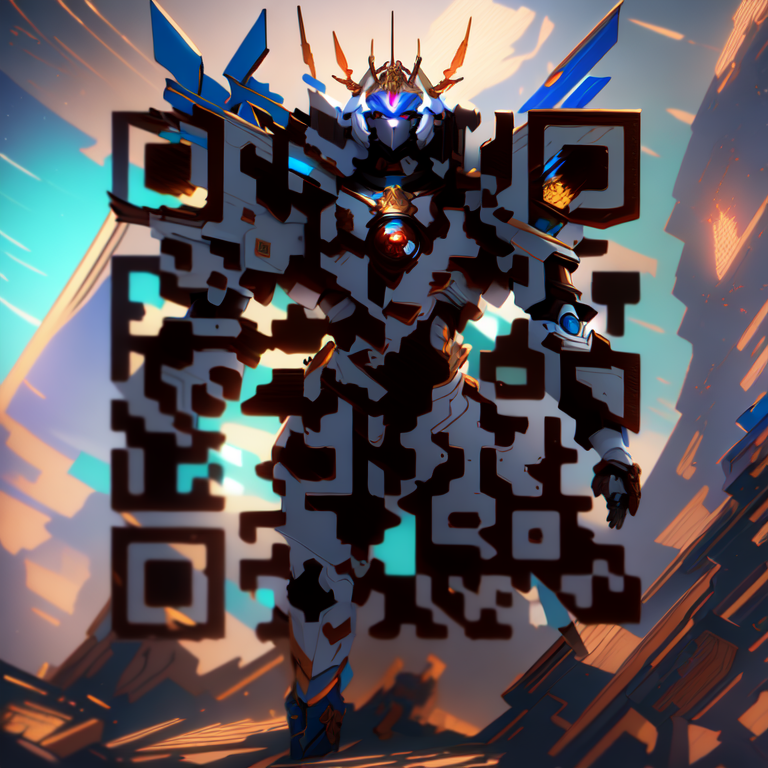

In [26]:
# prompt = "<lora:add_detail:1.5> , (Macro photo), miniature, (diorama), red panda (plushie), chibi, toy, (bokeh), close-up photo, 35mm, bokeh, 9:16, (intricate details:1.12), hdr, (intricate details, hyperdetailed:1.15), (soft light, sharp:1.5) <lyco:GoodHands-beta2:1> <lora:COOLKIDS:0.5>"
# prompt =" saigyou_ayakashi,  <lora:SaigyouAyakashiV1-000008:1>,bare tree,"
prompt = "(masterpiece, best quality:1.3),extremely high detailed, intricate, 8k, HDR, wallpaper, cinematic lighting, <lora:Mecha:1> ,large sword,  glowing, glowing eyes, mecha, realistic,   <lora:CyberPunkAI:0.5>"
# negative_prompt = "EasyNegativeV2, (bad-hands-5:1.2) Steps: 22, Sampler: Euler a, CFG scale: 8, Seed: 3478501788, Size: 768x768, Model hash: ec6f68ea63, ControlNet 0: preprocessor: inpaint_global_harmonious, model: controlnetQRCode_sd15V1 [9c780d03], weight: 1.2, starting/ending: (0, 1), resize mode: Crop and Resize, pixel perfect: True, control mode: Balanced, preprocessor params: (-1, -1, -1), Lora hashes: add_detail: 7c6bad76eb54"
negative_prompt = "(worst quality, low quality:2), (monochrome), zombie,overexposure, watermark,text,bad anatomy,bad hand,extra hands,extra fingers,too many fingers,fused fingers,bad arm,distorted arm,extra arms,fused arms,extra legs,missing leg,disembodied leg,extra nipples, detached arm, liquid hand,inverted hand,disembodied limb, loli, oversized head,extra body,extra navel,easynegative,sketch, duplicate, ugly, huge eyes, text, logo, worst face, (bad and mutated hands:1.3),  (blurry:2.0), horror, geometry, bad_prompt, (bad hands), (missing fingers), multiple limbs, bad anatomy, (interlocked fingers:1.2), Ugly Fingers, (extra digit and hands and fingers and legs and arms:1.4), (deformed fingers:1.2), (long fingers:1.2),(bad-artist-anime), bad-artist, bad hand, extra legs ,(ng_deepnegative_v1_75t) ,bad-hands-5"
qrcode_content = "https://killerstrike17.github.io/"
qr_code_image = generate_qr_code(qrcode_content)
# generator = torch.Generator().manual_seed(2174793473)
# seed = random.randint(1, 1000000000000)
seed = 885162813
print("Seed:",seed)

generator = torch.Generator().manual_seed(seed)
# .manual_seed(2324230317)
# .initial_seed(2174793473)


output = pipe(
    prompt=prompt, 
    negative_prompt=negative_prompt,
    image = qr_code_image,
    width = qr_code_image.width,
    height=qr_code_image.height,
    guidance_scale=10,
    controlnet_conditioning_scale=3.0,
    control_guidance_start= 0.23,
    control_guidance_end= 0.9,
    generator=generator,
    num_inference_steps=50,
    # seed = 2174793473
)
output[0][0].save("Robot.png")
output[0][0]

Seed: 899767155924


  0%|          | 0/50 [00:00<?, ?it/s]

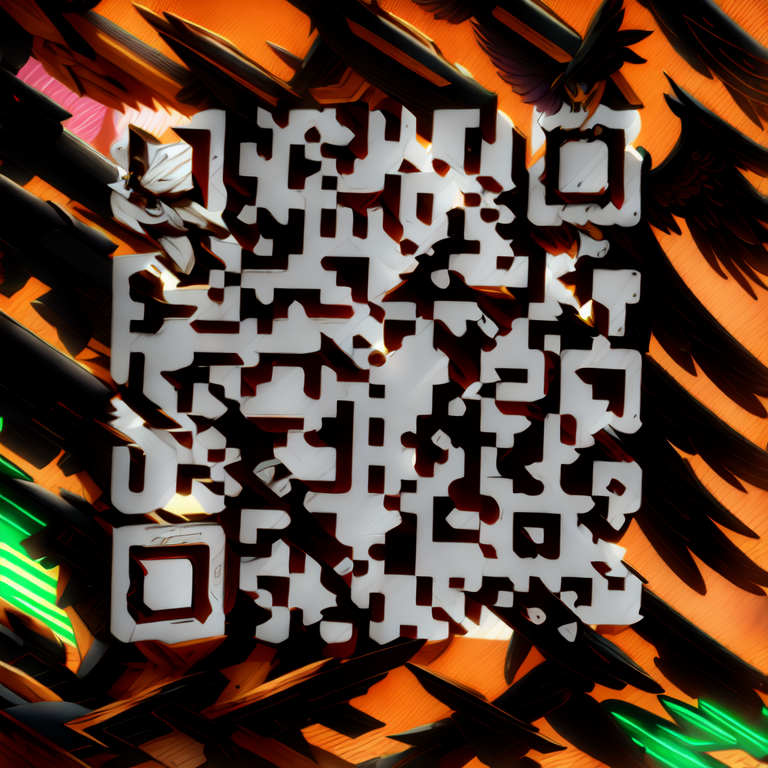

In [25]:
import random
# prompt = "<lora:add_detail:1.5> , (Macro photo), miniature, (diorama), red panda (plushie), chibi, toy, (bokeh), close-up photo, 35mm, bokeh, 9:16, (intricate details:1.12), hdr, (intricate details, hyperdetailed:1.15), (soft light, sharp:1.5) <lyco:GoodHands-beta2:1> <lora:COOLKIDS:0.5>"
# prompt =" saigyou_ayakashi,  <lora:SaigyouAyakashiV1-000008:1>,bare tree,"
prompt = "mechangel, wings, solo, sitting,armor, halo, building, mechanical wings <lora:mechaangelv2-noise:1>"
# negative_prompt = "EasyNegativeV2, (bad-hands-5:1.2) Steps: 22, Sampler: Euler a, CFG scale: 8, Seed: 3478501788, Size: 768x768, Model hash: ec6f68ea63, ControlNet 0: preprocessor: inpaint_global_harmonious, model: controlnetQRCode_sd15V1 [9c780d03], weight: 1.2, starting/ending: (0, 1), resize mode: Crop and Resize, pixel perfect: True, control mode: Balanced, preprocessor params: (-1, -1, -1), Lora hashes: add_detail: 7c6bad76eb54"
negative_prompt = "(worst quality, low quality, normal quality:1.4),(inaccurate limb:1.2),white background,simple background,bad anatomy, bad hands, text, error, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts,signature, watermark, username, blurry, artist name,bad feet,(((ugly))),(((duplicate))),((morbid)),((mutilated)),(((tranny))),mutated hands,(((poorly drawn hands))),(((blurry))),((bad anatomy)),(((bad proportions))),extra limbs,cloned face,(((disfigured))),(((more than 2 nipples))),((((missing arms)))),(((extra legs))),mutated hands,(((((fused fingers))))),(((((too many fingers))))),(((unclear eyes))),missing fingers, low quality body parts, missing body parts, disproportional body parts,indistinguishable body parts, branched body parts, bent, body parts, rheumatism finers, ugly fingers, melted fingers, too fat, too skiny, low quality female, low quality male, poor colors, low quality clothes, poor background, wholesome,  less details, censored, multiple legs,gay,uncensored,EasyNegative,"
qrcode_content = "https://killerstrike17.github.io/"
qr_code_image = generate_qr_code(qrcode_content)
# generator = torch.Generator().manual_seed(2174793473)
seed = random.randint(1, 1000000000000)
# seed = 1941543672
print("Seed:",seed)

generator = torch.Generator().manual_seed(seed)
# .manual_seed(2324230317)
# .initial_seed(2174793473)


output = pipe(
    prompt=prompt, 
    negative_prompt=negative_prompt,
    image = qr_code_image,
    width = qr_code_image.width,
    height=qr_code_image.height,
    guidance_scale=15,
    controlnet_conditioning_scale=3.0,
    control_guidance_start= 0.23,
    control_guidance_end= 0.9,
    generator=generator,
    num_inference_steps=50,
    # seed = 2174793473
)
output[0][0].save("./Output/Angel.png")
output[0][0]